In [1]:
#Importing Employment SNAP 2010 data, filtering out relevant data 
import numpy as np
import pandas as pd

employment = pd.read_csv('employment.csv', usecols = ["Neighborhood","Population (2010)", "Total Age 16+ N'hood Residents Employed (2010 Est.)"])

#removing commas from numeric data
employment = employment.replace(',', '', regex = True)

#convert numeric data to float
employment['Population (2010)'] = employment['Population (2010)'].astype(float)
employment['Total Age 16+ N\'hood Residents Employed (2010 Est.)'] = employment['Total Age 16+ N\'hood Residents Employed (2010 Est.)'].astype(float)
employment.head()

,Neighborhood,Population (2010),Total Age 16+ N'hood Residents Employed (2010 Est.)
0,Allegheny Center,933.0,386.0
1,Allegheny West,462.0,151.0
2,Allentown,2500.0,858.0
3,Arlington,1869.0,685.0
4,Arlington Heights,244.0,72.0


In [2]:
#creating new column for employment per population
#multiply by 100 to see the rates easier
employment['Employment Rate'] = employment['Total Age 16+ N\'hood Residents Employed (2010 Est.)'] / employment['Population (2010)'] * 100

#sorting from highest to lowest employment rate
employment = employment.sort_values(by='Employment Rate', ascending = False)
employment


,Neighborhood,Population (2010),Total Age 16+ N'hood Residents Employed (2010 Est.),Employment Rate
70,South Shore,19.0,38.0,200.000000
77,St. Clair,209.0,289.0,138.277512
73,Spring Garden,884.0,668.0,75.565611
54,New Homestead,990.0,737.0,74.444444
64,Polish Hill,1274.0,941.0,73.861852
...,...,...,...,...
10,Bluff,6600.0,1491.0,22.590909
26,East Carnegie,570.0,109.0,19.122807
35,Glen Hazel,716.0,89.0,12.430168
31,Fairywood,1002.0,117.0,11.676647


In [3]:
#filtering out unreasonable data, employment rate > 100% (more employed than total population)
employment = employment.loc[employment['Employment Rate'] < 100]

#filtering out outliers, where total population is less than 100
employment = employment.loc[employment['Population (2010)'] > 100]

employment

,Neighborhood,Population (2010),Total Age 16+ N'hood Residents Employed (2010 Est.),Employment Rate
73,Spring Garden,884.0,668.0,75.565611
54,New Homestead,990.0,737.0,74.444444
64,Polish Hill,1274.0,941.0,73.861852
65,Regent Square,928.0,657.0,70.797414
71,South Side Flats,6597.0,4425.0,67.075944
...,...,...,...,...
57,Northview Heights,1214.0,296.0,24.382208
10,Bluff,6600.0,1491.0,22.590909
26,East Carnegie,570.0,109.0,19.122807
35,Glen Hazel,716.0,89.0,12.430168


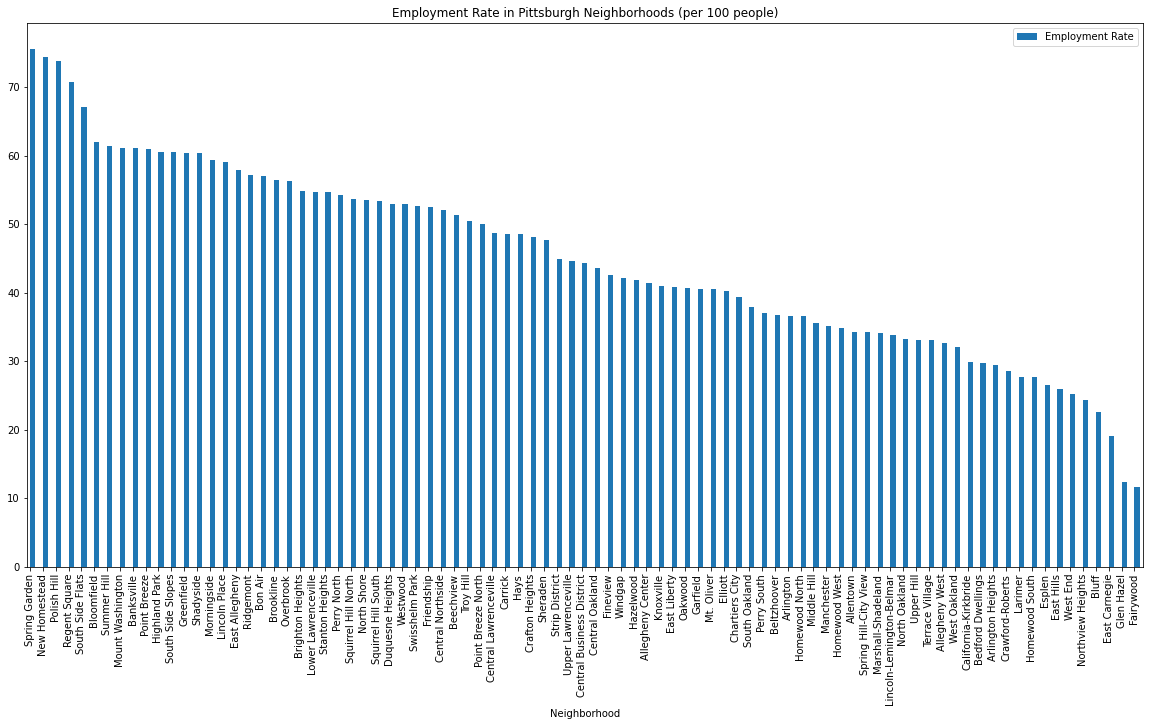

In [12]:
#Plotting a bar graph of Employment Rate in Pittsburgh Neighborhoods (per 100 people)
employment.plot(title = "Employment Rate in Pittsburgh Neighborhoods (per 100 people)", x = "Neighborhood", y = "Employment Rate", kind ="bar", width = .4, figsize = (20,10), position=0)



## Conclusion: 

Spring Garden has the highest employment rate of 75.56%, closely followed by New Homestead and Polish Hill. I omitted certain neighborhoods that were outliers due to the data values associated with the total population number and the number of residents employed. In some neighborhoods, there were more people employed than there was actually living in the residential area, which seemed odd and unreasonable. There is no information in the dataset or dictionary that would explain this disrepancy. The first instance of this case was South Shore with an employment of 38 and a total population of 19, making the employment rate 200.00%. The second instance was St. Clair with an employment of 289 and a total population of 209, making the employment rate 138.28%. Since the population varied across the neighborhoods and smaller number would skew the results and create outliers, I filtered out neighborhoods with a total population count lower than 100. Before filtering, the lowest employment rate for a neighborhood was Chateau at 0%, as there were no residents employed. This doesn't necessarily make it the worst neighborhood, however, as the population is low (11) and the residents could simply be elderly people. After filtering, Fairywood became the scored the lowest, with an employment rate of 11.68% and a total population of 1002. Since Spring Garden has the highest employment rate with a considerable total population of 884, it is considered a potential candidate for the best neighborhood in Pittsburgh.

Recap - Best: Spring Garden | Worst: Fairywood